# **PROBLEM DESCRIPTION:**
### Prepare a Python notebook to build, train and evaluate a regression model on the given dataset. Please read the instructions carefully.

# **BUSINESS CASE:** 
### Build regression models to predict car price based on various features given in Car Price Dataset


In [1]:
#IMPORTING LIBRARIES

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
#LOADING THE DATASET

car = pd.read_csv("CarPrice.csv")

In [4]:
car.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


### There are 26 columns in this dataset, so it is very important to check whether there is any null values in the dataset or not:

In [5]:
car.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

### So this dataset doesn’t have any null values



# **DATA UNDERSTANDING AND EXPLORATION**

In [6]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [7]:
car.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [8]:
car.CarName.unique()

array(['alfa-romero giulia', 'alfa-romero stelvio',
       'alfa-romero Quadrifoglio', 'audi 100 ls', 'audi 100ls',
       'audi fox', 'audi 5000', 'audi 4000', 'audi 5000s (diesel)',
       'bmw 320i', 'bmw x1', 'bmw x3', 'bmw z4', 'bmw x4', 'bmw x5',
       'chevrolet impala', 'chevrolet monte carlo', 'chevrolet vega 2300',
       'dodge rampage', 'dodge challenger se', 'dodge d200',
       'dodge monaco (sw)', 'dodge colt hardtop', 'dodge colt (sw)',
       'dodge coronet custom', 'dodge dart custom',
       'dodge coronet custom (sw)', 'honda civic', 'honda civic cvcc',
       'honda accord cvcc', 'honda accord lx', 'honda civic 1500 gl',
       'honda accord', 'honda civic 1300', 'honda prelude',
       'honda civic (auto)', 'isuzu MU-X', 'isuzu D-Max ',
       'isuzu D-Max V-Cross', 'jaguar xj', 'jaguar xf', 'jaguar xk',
       'maxda rx3', 'maxda glc deluxe', 'mazda rx2 coupe', 'mazda rx-4',
       'mazda glc deluxe', 'mazda 626', 'mazda glc', 'mazda rx-7 gs',
       'mazda glc 

### So, **The column Price is the Target Variable** and rest of the columns are independent variables.

### The independent variables are again divided into Categorical and Numerical variables--

## **Numerical variables:** 
### ‘wheelbase’, ‘carlength’, ‘carwidth’, ‘carheight’, ‘curbweight’, ‘enginesize’, ‘boreratio’, ‘stroke’, ‘compressionratio’, ‘horsepower’, ‘peakrpm’, ‘citympg’, ‘highwaympg’

## **Categorical variables:** 
### ‘symboling’, ‘fueltype’, ‘aspiration’, ‘doornumber’, ‘carbody’, ‘drivewheel’, ‘enginelocation’, ‘enginetype’, ‘cylindernumber’, ‘fuelsystem’ ‘car_name’

In [9]:
car = car.drop(['car_ID'],axis=1)

### Let’s see the distribution of the values of the target variable price:

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


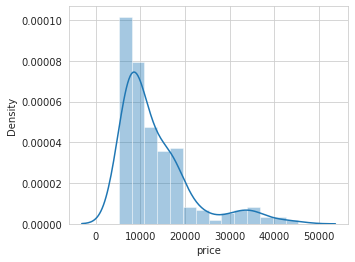

In [10]:
sns.set_style("whitegrid")
plt.figure(figsize=(5, 4))
sns.distplot(car.price)
plt.show()

### Now will check the correlation among all the features of this dataset:

## **Heatmap to show correlation of Numerical and Target variable:**

Now let’s plot Heatmap which is useful to visualise multiple correlations among numerical variables. We have also used the Target variable “Price” to understand the correlation of numerical variables with it.

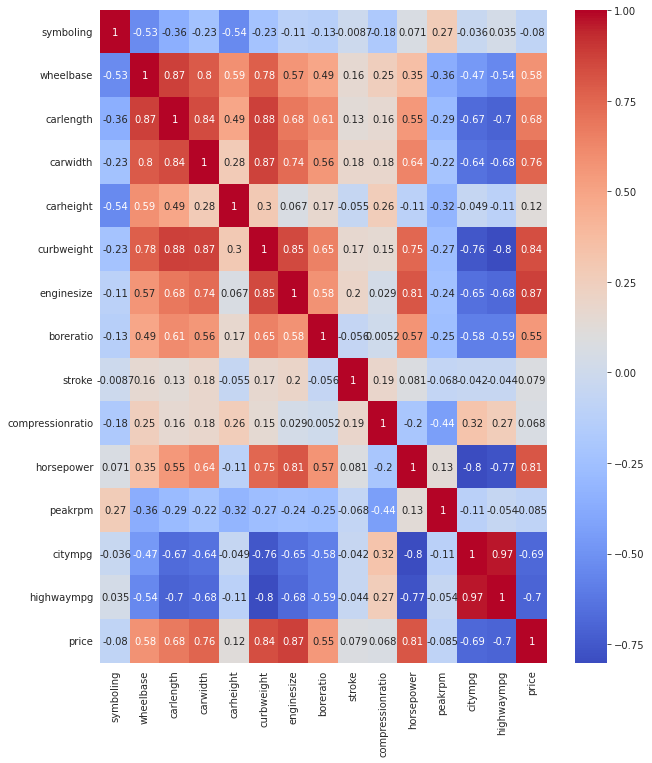

In [11]:
plt.figure(figsize=(10, 12))
correlation = car.corr()
sns.heatmap(correlation, cmap="coolwarm", annot=True)
plt.show()

## The heatmap shows some useful insights:

### Correlation of target variable “Price” with independent variables:

- Price is highly (positively) correlated with wheelbase, carlength, carwidth, curbweight, enginesize, horsepower, citympg

- Price is negatively correlated to ‘symbolingg’, ‘peakrpm’, 'citympg', 'highwaympg'.

### Correlation among independent variables:

- Many independent variables are highly correlated: wheelbase, carlength, carwidth, curbweight, enginesize etc. are all measures of ‘size/weight’, and are positively correlated

# **DATA PREPARATION**

### Splitting out the independent and dependent data

In [12]:
X = car.loc[:, ['symboling', 'fueltype', 'aspiration', 'doornumber','carbody', 'drivewheel', 'enginelocation', 'wheelbase', 'carlength','carwidth',
                 'carheight', 'curbweight', 'enginetype', 'cylindernumber','enginesize', 'fuelsystem', 'boreratio', 'stroke', 'compressionratio',
                 'horsepower', 'peakrpm', 'citympg', 'highwaympg']]
y = car['price']

# **Creating dummy variables for categorical variables.**

In [13]:
car.drop(["symboling","CarName"], axis=1, inplace=True)

In [14]:
car.head()

,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [15]:
car = pd.get_dummies(car, columns= ["drivewheel"], drop_first=True)

In [16]:
car = pd.get_dummies(car, columns= ["doornumber"], drop_first=True)

In [17]:
car = pd.get_dummies(car, columns= ["cylindernumber"], drop_first=True)

In [18]:
car = pd.get_dummies(car, columns= ["fueltype"], drop_first=True)

In [19]:
car = pd.get_dummies(car, columns= ["aspiration"], drop_first=True)

In [20]:
car = pd.get_dummies(car, columns= ["carbody"], drop_first=True)

In [21]:
car = pd.get_dummies(car, columns= ["enginelocation"], drop_first=True)

In [22]:
car = pd.get_dummies(car, columns= ["enginetype"], drop_first=True)

In [23]:
car = pd.get_dummies(car, columns= ["fuelsystem"], drop_first=True)

In [24]:
car.head()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,...,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,...,0,0,0,0,0,0,0,1,0,0
1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,...,0,0,0,0,0,0,0,1,0,0
2,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,...,0,1,0,0,0,0,0,1,0,0
3,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,...,0,0,0,0,0,0,0,1,0,0
4,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,...,0,0,0,0,0,0,0,1,0,0


# **Final Train-Test split of data**

In [30]:
X=car.drop("price", axis=1)
Y=car["price"]

In [31]:
print(X)

     wheelbase  carlength  carwidth  carheight  curbweight  enginesize  \
0         88.6      168.8      64.1       48.8        2548         130   
1         88.6      168.8      64.1       48.8        2548         130   
2         94.5      171.2      65.5       52.4        2823         152   
3         99.8      176.6      66.2       54.3        2337         109   
4         99.4      176.6      66.4       54.3        2824         136   
..         ...        ...       ...        ...         ...         ...   
200      109.1      188.8      68.9       55.5        2952         141   
201      109.1      188.8      68.8       55.5        3049         141   
202      109.1      188.8      68.9       55.5        3012         173   
203      109.1      188.8      68.9       55.5        3217         145   
204      109.1      188.8      68.9       55.5        3062         141   

     boreratio  stroke  compressionratio  horsepower  ...  enginetype_ohcf  \
0         3.47    2.68           

In [32]:
print(Y)

0      13495.0
1      16500.0
2      16500.0
3      13950.0
4      17450.0
        ...   
200    16845.0
201    19045.0
202    21485.0
203    22470.0
204    22625.0
Name: price, Length: 205, dtype: float64


### **Spliiting data in Training set and Test Set**

In [33]:
test_size = 0.25
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = test_size, random_state = 20)

### **Printing the shapes of train and test data**

In [34]:
print("X_train shape {}, len {}.".format(X_train.shape,len(X_train)))
print("X_test shape {}, len {}.".format(X_test.shape,len(X_test)))
print("Y_train shape {}, len {}.".format(Y_train.shape,len(Y_train)))
print("Y_test shape {}, len {}.".format(Y_test.shape,len(Y_test)))

X_train shape (153, 42), len 153.
X_test shape (52, 42), len 52.
Y_train shape (153,), len 153.
Y_test shape (52,), len 52.


# **Decision Tree Regression Model Building**

### **Building a decision tree regression model**

In [41]:
from sklearn.tree import DecisionTreeRegressor
dtree=DecisionTreeRegressor()
dtree.fit(X_train,Y_train)

DecisionTreeRegressor()

In [42]:
pred=dtree.predict(X_test)

In [45]:
from sklearn.metrics import r2_score
print(r2_score(y_true=Y_test, y_pred=pred))


0.7067531082501228


In [46]:
Y_test.head()

5      15250.0
44      8916.5
155     8778.0
129    31400.5
152     6488.0
Name: price, dtype: float64

In [47]:
pred

array([13950. ,  8916.5, 15985. , 45400. ,  5348. , 10698. ,  7395. ,
       11259. , 16630. , 15040. ,  7150.5,  8845. , 20970. ,  7299. ,
        8358. ,  7150.5, 13495. ,  7299. ,  8495. , 18920. , 10595. ,
        9095. , 28248. , 19699. , 18950. , 15985. ,  8058. , 13495. ,
       15998. ,  6529. ,  8921. ,  5348. ,  7995. , 13495. ,  7898. ,
       13950. ,  8495. , 13499. ,  7689. ,  9233. , 10795. ,  7299. ,
        9258. , 17450. ,  6229. , 12440. , 15985. ,  8921. , 15998. ,
       22625. ,  9988. , 22625. ])

## Random Forest

In [50]:
from sklearn.ensemble import RandomForestRegressor
from sklearn import model_selection
RForest=RandomForestRegressor()
RForest.fit(X_train,Y_train)

RandomForestRegressor()

In [51]:
r_pred=RForest.predict(X_test)

In [52]:
print(r2_score(y_true=Y_test, y_pred=r_pred))


0.8385293299099129


In [53]:
r_pred

array([12509.8       ,  7538.64      , 16916.17      , 37270.76      ,
        6502.65416667, 11568.58      ,  7213.334     , 12918.29      ,
       15295.59      , 14161.34      ,  7879.70083333, 10660.41      ,
       19500.88      ,  7219.071     ,  7583.29      ,  7242.80766667,
       12535.29      ,  7407.496     ,  9015.3       , 19171.79      ,
       10046.67      ,  8295.875     , 29949.84      , 19166.37167   ,
       16794.22167   , 15265.05334   ,  7716.9985    , 10181.57285714,
       17765.03668   ,  6594.545     ,  9569.18      ,  6541.9225    ,
        8098.64      , 10632.69      ,  7893.52      , 10560.82      ,
        9090.16      , 15983.96      ,  7740.56      ,  9163.11      ,
        8951.72      ,  7445.251     ,  8156.365     , 15401.85334   ,
        6426.14      , 14336.525     , 14729.31      ,  9398.42      ,
       17352.96668   , 20357.88      ,  9719.8       , 20968.39      ])

In [54]:
Y_test.head()

5      15250.0
44      8916.5
155     8778.0
129    31400.5
152     6488.0
Name: price, dtype: float64

In [56]:
print(r_pred.shape)
print('\n')
print(Y_test.shape)

(52,)


(52,)


## METRICS : DECISION TREE VS RANDOM FOREST

In [57]:
#FOR DECISION TREE METRICS
import sklearn.metrics as metrics

mae = metrics.mean_absolute_error(Y_test, pred)
mse = metrics.mean_squared_error(Y_test, pred)
rmse = np.sqrt(mse)   
r2 = metrics.r2_score(Y_test,pred)

print("Results of sklearn.metrics:")
print("MAE:",mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R-Squared:", r2)

Results of sklearn.metrics:
MAE: 1800.8557692307693
MSE: 8722773.379807692
RMSE: 2953.4341671700913
R-Squared: 0.7067531082501228


In [58]:
#For Random Forest Metrics
r_mae = metrics.mean_absolute_error(Y_test, r_pred)
r_mse = metrics.mean_squared_error(Y_test, r_pred)
r_rmse = np.sqrt(mse)   
r_r2 = metrics.r2_score(Y_test,r_pred)

print("Results of sklearn.metrics:")
print("MAE:",r_mae)
print("MSE:", r_mse)
print("RMSE:",r_rmse)
print("R-Squared:", r_r2)


Results of sklearn.metrics:
MAE: 1543.8688185347985
MSE: 4803024.6945732925
RMSE: 2953.4341671700913
R-Squared: 0.8385293299099129


## Thus we can say comparing the metrics that Random Forest is a better model to predict car prices compared to Decision Trees.